# ML Assignmnt 06: Clustering Methods
Juee S (PD_49) PRN: 1032222572

Dataset: https://www.kaggle.com/datasets/uciml/iris

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository. It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.
Columns include: ID, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species

In this assignment, we're performing the k-Means clustering algorithm (using Elbow Method), DBSCAN and Birch Clustering method and compare their results in terms of clusters and noise points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [2]:
# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data

# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
# Determine the optimal number of clusters using the Elbow method
distortions = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])


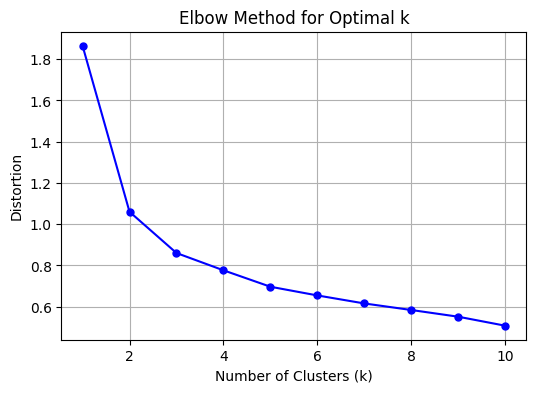

In [4]:
# Plot the Elbow Method graph
plt.figure(figsize=(6, 4))
plt.plot(K, distortions, 'bo-', markersize=5)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [5]:
# Optimal k visually determined as 3
optimal_k = 3

In [7]:
# Applying Clustering Algorithms
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10).fit(X_scaled)
dbscan = DBSCAN(eps=0.8, min_samples=5).fit(X_scaled)  # Tuned eps for better clustering
birch = Birch(n_clusters=optimal_k).fit(X_scaled)

In [8]:
# Extracting labels
labels_kmeans = kmeans.labels_
labels_dbscan = dbscan.labels_
labels_birch = birch.labels_

In [9]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [11]:
# Get actual component names
pca_component_names = [f"{iris.feature_names[i]} (PCA)" for i in range(2)]

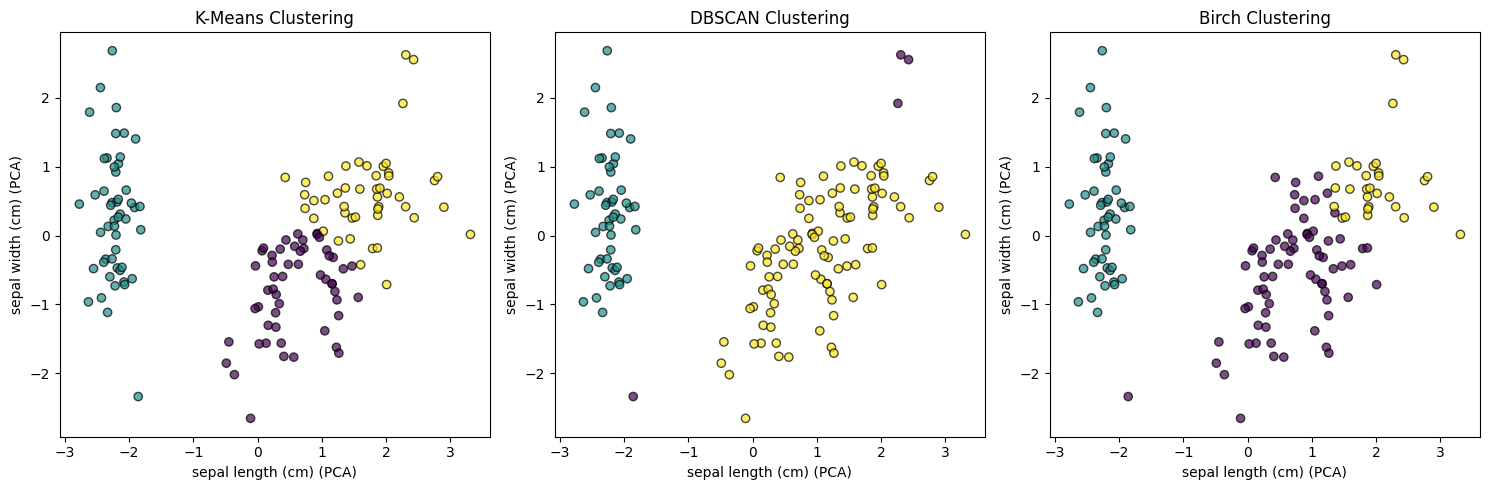

In [12]:
# Plotting Clustering Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['K-Means Clustering', 'DBSCAN Clustering', 'Birch Clustering']
labels = [labels_kmeans, labels_dbscan, labels_birch]

for i, ax in enumerate(axes):
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels[i], cmap='viridis', edgecolors='k', alpha=0.7)
    ax.set_title(titles[i])
    ax.set_xlabel(pca_component_names[0])
    ax.set_ylabel(pca_component_names[1])

plt.tight_layout()
plt.show()

In [13]:
# Comparing the three clustering methods
unique_kmeans = len(np.unique(labels_kmeans))
unique_dbscan = len(np.unique(labels_dbscan))
unique_birch = len(np.unique(labels_birch))

comparison_results = {
    "K-Means": {"Clusters": unique_kmeans, "Noise Points": sum(labels_kmeans == -1)},
    "DBSCAN": {"Clusters": unique_dbscan, "Noise Points": sum(labels_dbscan == -1)},
    "Birch": {"Clusters": unique_birch, "Noise Points": sum(labels_birch == -1)}
}

In [ ]:
print("Comparison of Clustering Methods:")
for method, results in comparison_results.items():
    print(f"{method}: Clusters = {results['Clusters']}, Noise Points = {results['Noise Points']}")

Comparison of Clustering Methods:
K-Means: Clusters = 3, Noise Points = 0
DBSCAN: Clusters = 3, Noise Points = 4
Birch: Clusters = 3, Noise Points = 0
